In [1]:
import numpy as np
import pandas as pd
import mne
import os
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, resample, savgol_filter

from source.data_loader import load_eeg_data, open_json_file, select_recording, read_time_domain_data

from source.sync_peaks_finder import find_eeg_peak, find_dbs_peak, detect_eeg_drop_onset

In [2]:
sub_ids = [ 'P4-2001', 'P4-2002', 'P4-2003', 'P4-2004', 'P4-2005', 'P4-2007', 'P4-2008', 'P4-2009']

block = 'baseline'

dataDir_server = r"/Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB"


Function for EEG Power Calculation

---
Processing subject P4-2001 for block baseline...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.2e+02 - 1.3e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 120.00
- Lower transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 105.00 Hz)
- Upper passband edge: 130.00 Hz
- Upper transition bandwidth: 32.50 Hz (-6 dB cutoff frequency: 146.25 Hz)
- Filter length: 221 samples (0.111 s)

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`
---
Peak time logged in sync_log.txt
---
Please close the plot to continue.
---


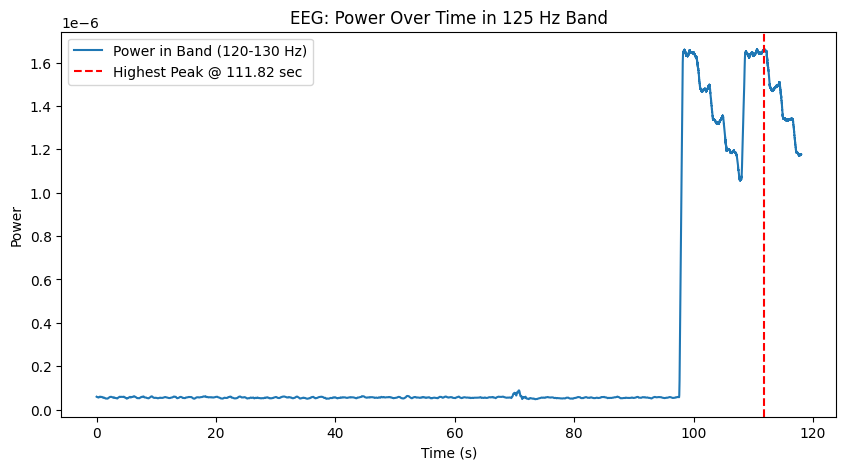

---
Processing subject P4-2002 for block baseline...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.2e+02 - 1.3e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 120.00
- Lower transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 105.00 Hz)
- Upper passband edge: 130.00 Hz
- Upper transition bandwidth: 32.50 Hz (-6 dB cutoff frequency: 146.25 Hz)
- Filter length: 221 samples (0.111 s)

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`
---
Peak time logged in sync_log.txt
---
Please close the plot to continue.
---


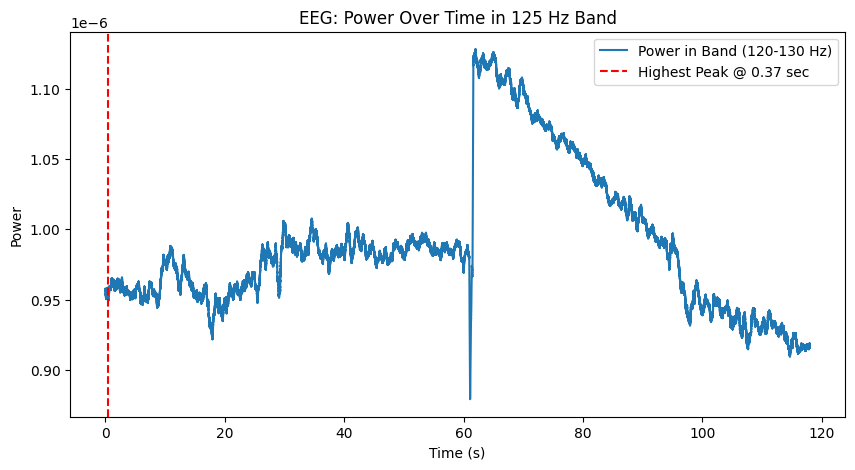

---
Processing subject P4-2003 for block baseline...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.2e+02 - 1.3e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 120.00
- Lower transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 105.00 Hz)
- Upper passband edge: 130.00 Hz
- Upper transition bandwidth: 32.50 Hz (-6 dB cutoff frequency: 146.25 Hz)
- Filter length: 221 samples (0.111 s)

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`
---
Peak time logged in sync_log.txt
---
Please close the plot to continue.
---


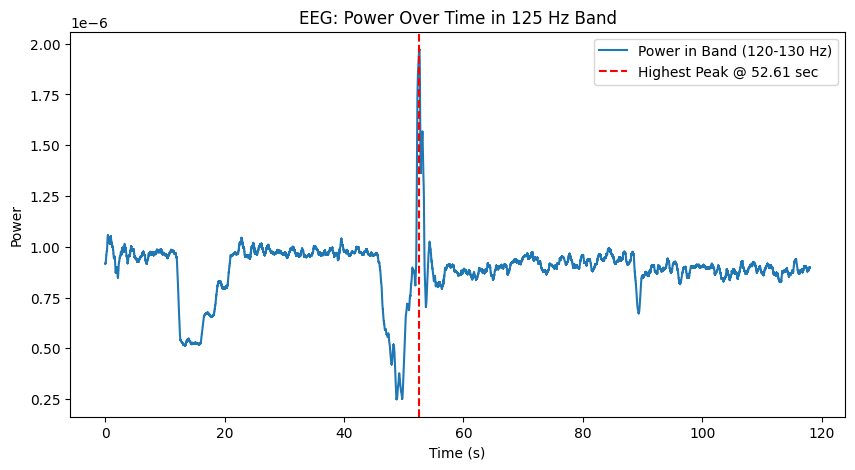

---
Processing subject P4-2004 for block baseline...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.2e+02 - 1.3e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 120.00
- Lower transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 105.00 Hz)
- Upper passband edge: 130.00 Hz
- Upper transition bandwidth: 32.50 Hz (-6 dB cutoff frequency: 146.25 Hz)
- Filter length: 221 samples (0.111 s)

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`
---
Peak time logged in sync_log.txt
---
Please close the plot to continue.
---


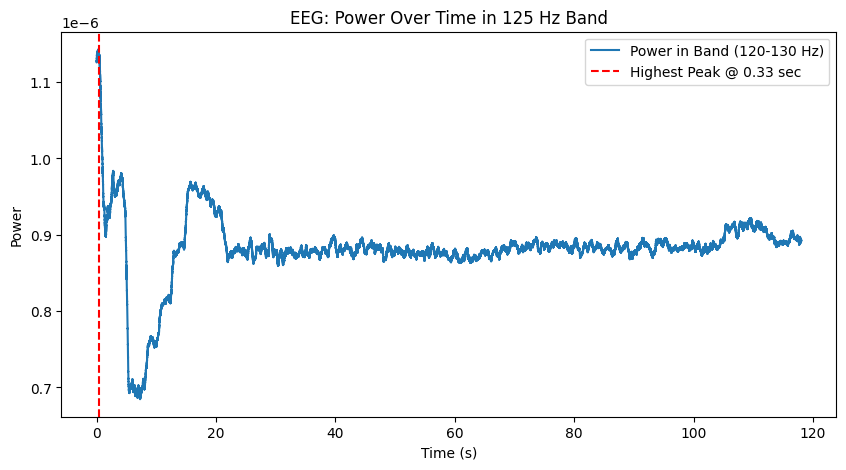

---
Processing subject P4-2005 for block baseline...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.2e+02 - 1.3e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 120.00
- Lower transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 105.00 Hz)
- Upper passband edge: 130.00 Hz
- Upper transition bandwidth: 32.50 Hz (-6 dB cutoff frequency: 146.25 Hz)
- Filter length: 221 samples (0.111 s)

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`
---
Peak time logged in sync_log.txt
---
Please close the plot to continue.
---


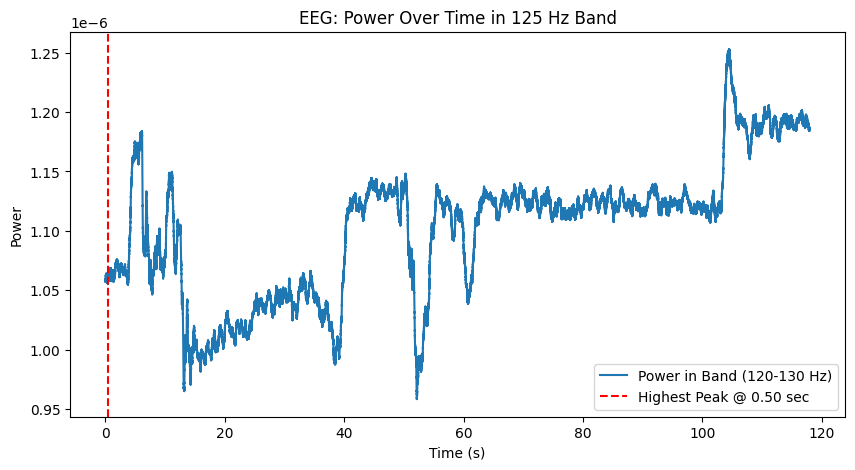

---
Processing subject P4-2007 for block baseline...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.1e+02 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 110.00
- Lower transition bandwidth: 27.50 Hz (-6 dB cutoff frequency: 96.25 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 122.50 Hz)
- Filter length: 165 samples (0.660 s)

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`
---
Peak time logged in sync_log.txt
---
Please close the plot to continue.
---


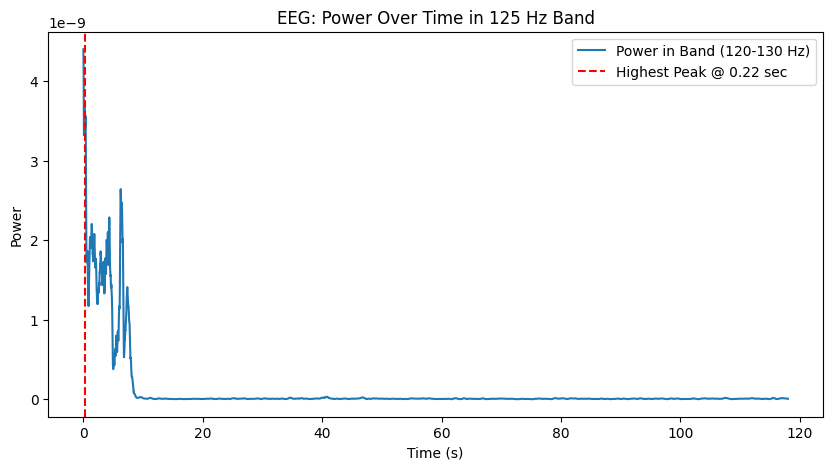

---
Processing subject P4-2008 for block baseline...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.2e+02 - 1.3e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 120.00
- Lower transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 105.00 Hz)
- Upper passband edge: 130.00 Hz
- Upper transition bandwidth: 32.50 Hz (-6 dB cutoff frequency: 146.25 Hz)
- Filter length: 221 samples (0.111 s)

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`
---
Peak time logged in sync_log.txt
---
Please close the plot to continue.
---


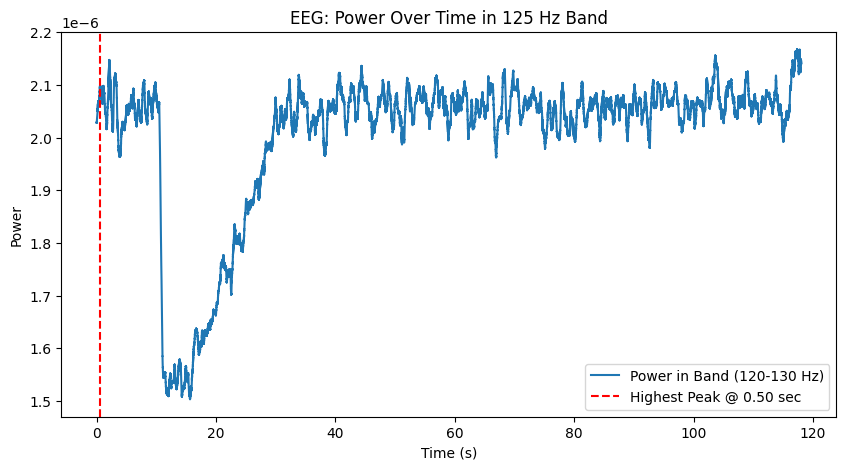

---
Processing subject P4-2009 for block baseline...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.2e+02 - 1.3e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 120.00
- Lower transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 105.00 Hz)
- Upper passband edge: 130.00 Hz
- Upper transition bandwidth: 32.50 Hz (-6 dB cutoff frequency: 146.25 Hz)
- Filter length: 221 samples (0.111 s)

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`
---
Peak time logged in sync_log.txt
---
Please close the plot to continue.
---


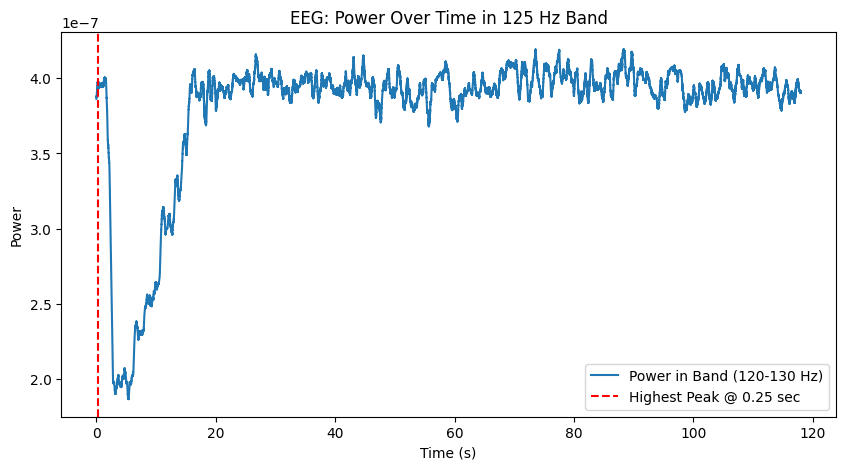

In [4]:
# loop through subjects

for sub_id in sub_ids:

    print(f"---\nProcessing subject {sub_id} for block {block}...")
    eeglab_file_path_components = [dataDir_server, sub_id, 'ProcessedData', 'EEG', block, block + '_prep.set']
    eeglab_file_path = os.path.join(*eeglab_file_path_components)
    # check if the file exists, if not, skip the subject
    if not os.path.exists(eeglab_file_path):
        print(f"---\nSkipping subject {sub_id} for block {block} as the file {eeglab_file_path} does not exist.")
        continue
    #  Load the EEG data
    raw = mne.io.read_raw_eeglab(eeglab_file_path, preload=True)

    # if subject is not P4-2006, use the default frequency range
    if sub_id == 'P4-2007':
        freq_low, freq_high = 110, 120
        
    else:   
        freq_low, freq_high = 120, 130

    eeg_peak_idx, eeg_peak_time, eeg_power_band_sum = find_eeg_peak(raw, freq_low, freq_high, 
                                                                    duration_sec=120, save_dir=None)


# DBS

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.2e+02 - 1.3e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 120.00
- Lower transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 105.00 Hz)
- Upper passband edge: 130.00 Hz
- Upper transition bandwidth: 32.50 Hz (-6 dB cutoff frequency: 146.25 Hz)
- Filter length: 221 samples (0.111 s)

NOTE: tfr_multitaper() is a legacy function. New code should use .compute_tfr(method="multitaper").
inst is Evoked, setting `average=False`
Peak time logged in sync_log.txt


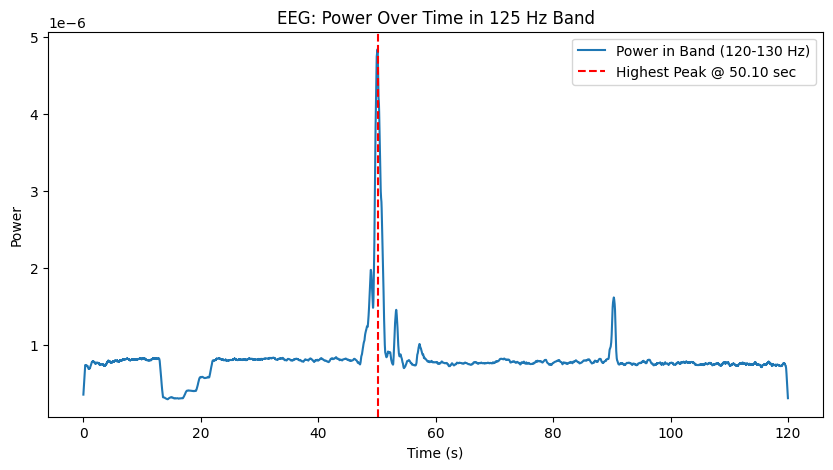

In [ ]:
# Find EEG peak
eeg_peak_fs = find_eeg_peak(raw, 120, 130, 4, duration_sec=120)

In [ ]:
file_info = [
    {"sub_id": "P4-2001", "file_path": "/Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2001/RawData/DBS/Report_Json_Session_Report_20240610T162159.json"},
    {"sub_id": "P4-2002", "file_path": "/Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2002/RawData/DBS/Report_Json_Session_Report_20240719T121230.json"},
    {"sub_id": "P4-2003", "file_path": "/Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2003/RawData/DBS/Report_Json_Session_Report_20241025T120701.json"},
    {"sub_id": "P4-2004", "file_path": "/Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2004/RawData/DBS/Report_Json_Session_Report_20241028T163753.json"},
    {"sub_id": "P4-2005", "file_path": "/Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2005/RawData/DBS/Report_Json_Session_Report_20241029T170455.json"},
    {"sub_id": "P4-2007", "file_path": "/Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2007/RawData/DBS/Report_Json_Session_Report_20250110T112532.json"},
    {"sub_id": "P4-2008", "file_path": "/Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2008/RawData/DBS/Report_Json_Session_Report_20250310T113259.json"},
    {"sub_id": "P4-2009", "file_path": "/Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2009/RawData/DBS/Report_Json_Session_Report_20250314T131338.json"},
]

Processing P4-2001 from /Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2001/RawData/DBS/Report_Json_Session_Report_20240610T162159.json
---
Successfully read DBS recording 0 with sampling frequency 250 Hz


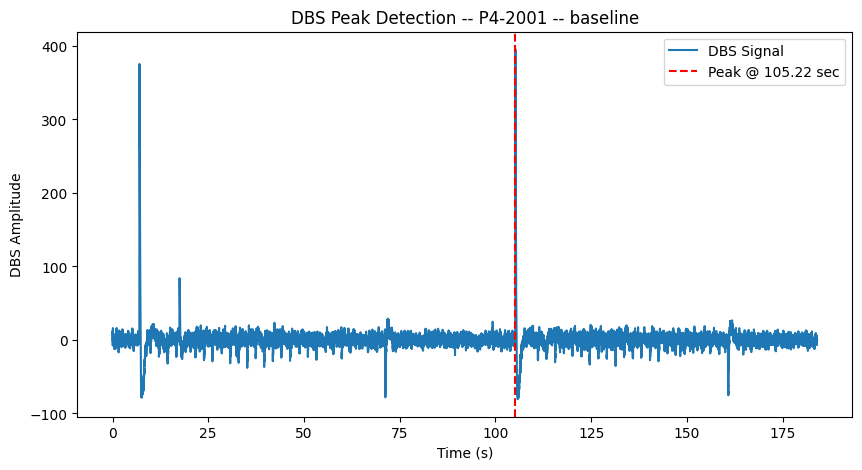

Processing P4-2002 from /Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2002/RawData/DBS/Report_Json_Session_Report_20240719T121230.json
---
Successfully read DBS recording 0 with sampling frequency 250 Hz


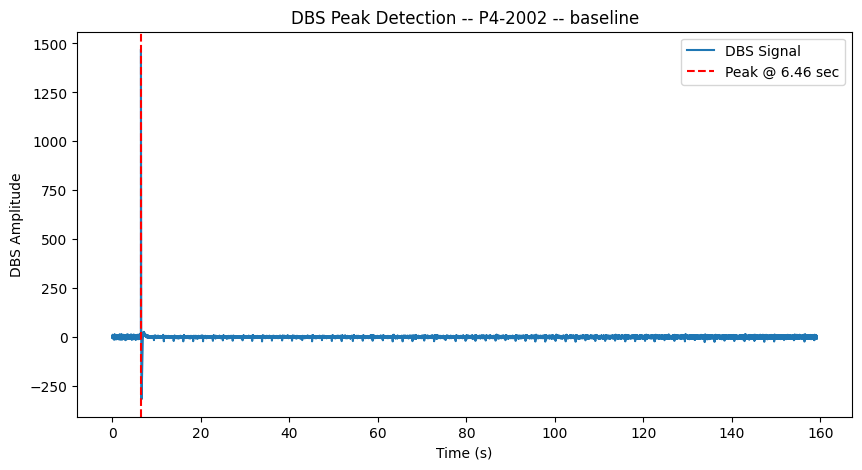

Processing P4-2003 from /Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2003/RawData/DBS/Report_Json_Session_Report_20241025T120701.json
---
Successfully read DBS recording 0 with sampling frequency 250 Hz


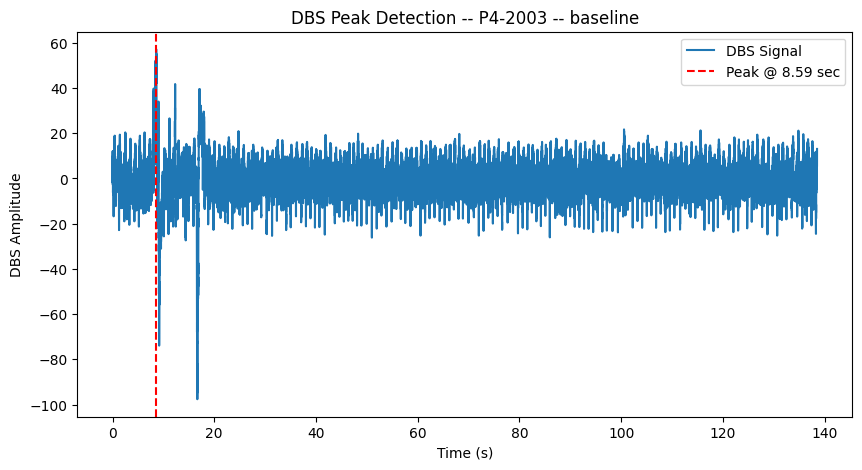

Processing P4-2004 from /Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2004/RawData/DBS/Report_Json_Session_Report_20241028T163753.json
---
Successfully read DBS recording 0 with sampling frequency 250 Hz


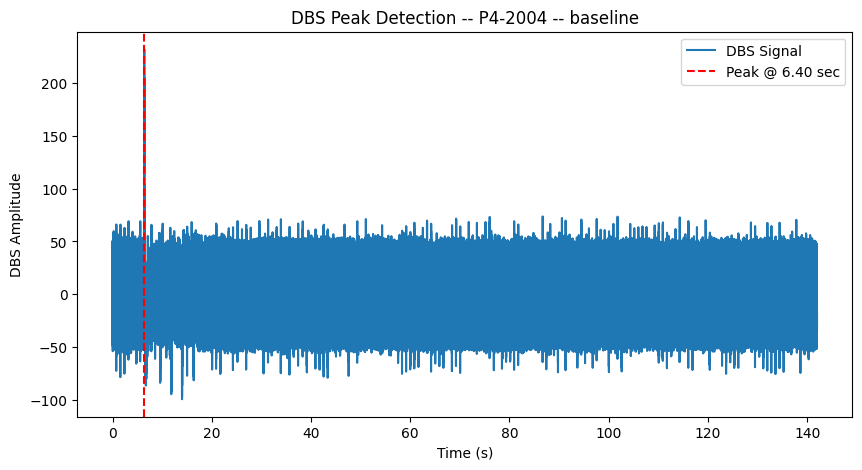

Processing P4-2005 from /Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2005/RawData/DBS/Report_Json_Session_Report_20241029T170455.json
---
Successfully read DBS recording 0 with sampling frequency 250 Hz


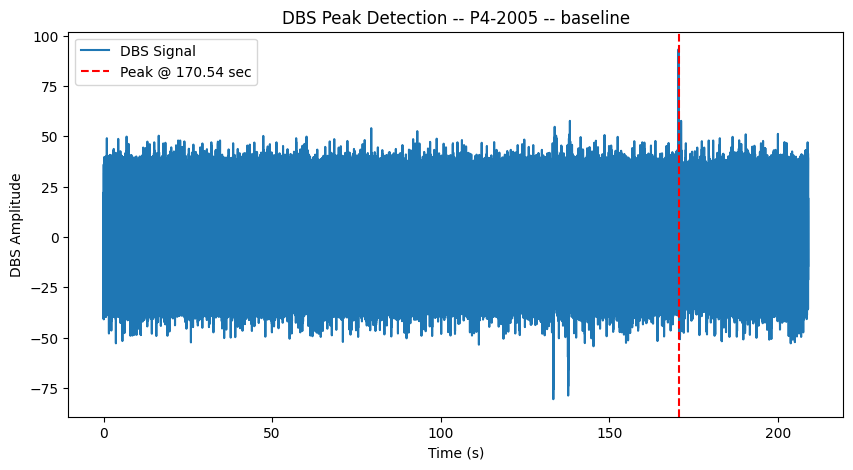

Processing P4-2007 from /Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2007/RawData/DBS/Report_Json_Session_Report_20250110T112532.json
---
Successfully read DBS recording 0 with sampling frequency 250 Hz


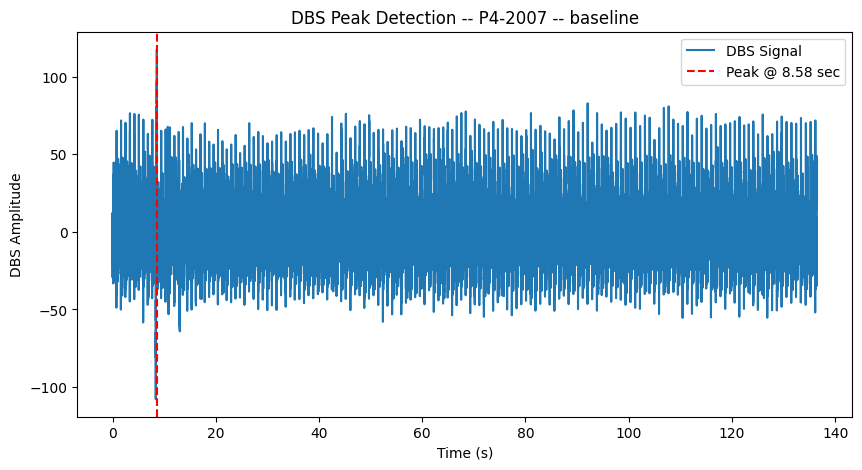

Processing P4-2008 from /Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2008/RawData/DBS/Report_Json_Session_Report_20250310T113259.json
---
Successfully read DBS recording 0 with sampling frequency 250 Hz


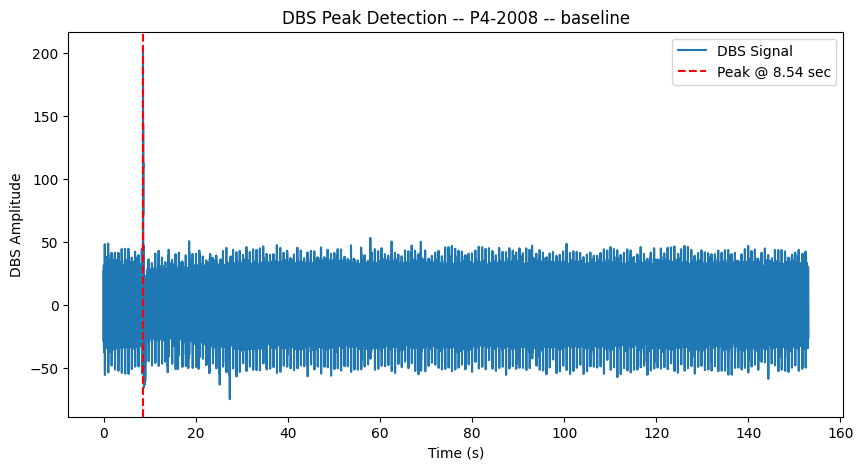

Processing P4-2009 from /Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2009/RawData/DBS/Report_Json_Session_Report_20250314T131338.json
---
Successfully read DBS recording 0 with sampling frequency 250 Hz


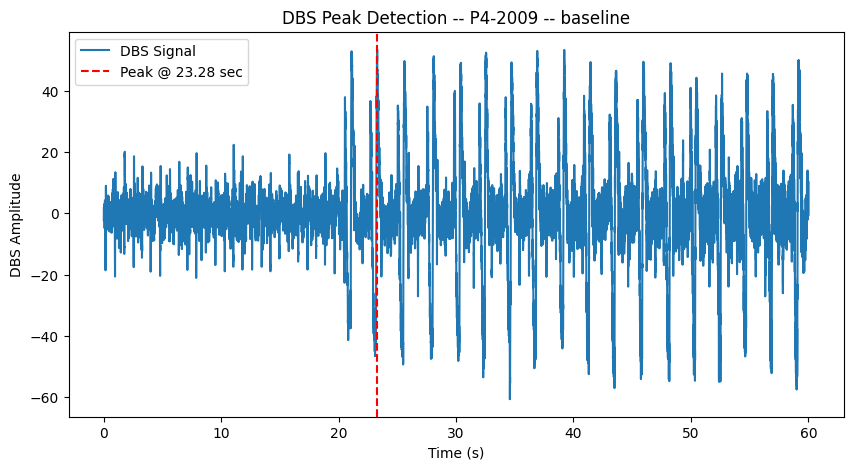

In [ ]:
for file in file_info:
    sub_id = file["sub_id"]
    dbs_path = file["file_path"]
    print(f"Processing {sub_id} from {dbs_path}")
    # Load DBS
    json_data = open_json_file(dbs_path)
    # block_num = select_recording(json_data)
    block_num = 0  # Assuming you want to process the first block
    dbs_data = read_time_domain_data(json_data, block_num)

    # Extract DBS signal
    dbs_signal = dbs_data["TimeDomainData"].values
    dbs_fs = dbs_data["SampleRateInHz"][0]

    # Compute time axis
    dbs_time_axis = np.arange(len(dbs_signal)) / dbs_fs

    # Find peaks **only in the positive direction**
    peaks, _ = find_peaks(dbs_signal, height=0)  # Only positive peaks

    if len(peaks) > 0:
        # Select the **highest** positive peak
        dbs_peak_index_fs = peaks[np.argmax(dbs_signal[peaks])]
    else:
        # Fallback: Use max value in the first 1000 samples
        dbs_peak_index_fs = np.argmax(dbs_signal[:1000])

    dbs_peak_index_s = dbs_peak_index_fs / dbs_fs

    # Plot detected peak
    plt.figure(figsize=(10, 5))
    plt.plot(dbs_time_axis, dbs_signal, label="DBS Signal")
    plt.axvline(dbs_time_axis[dbs_peak_index_fs], color='r', linestyle='--', label=f'Peak @ {dbs_peak_index_s:.2f} sec')
    plt.xlabel('Time (s)')
    plt.ylabel('DBS Amplitude')
    plt.title(f'DBS Peak Detection -- {sub_id} -- {block}')
    plt.legend()

    plt.show()

Processing P4-2001 from /Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2001/RawData/DBS/Report_Json_Session_Report_20240610T162159.json
---
Successfully read DBS recording 0 with sampling frequency 250 Hz
---
DBS peak time logged in sync_log.txt


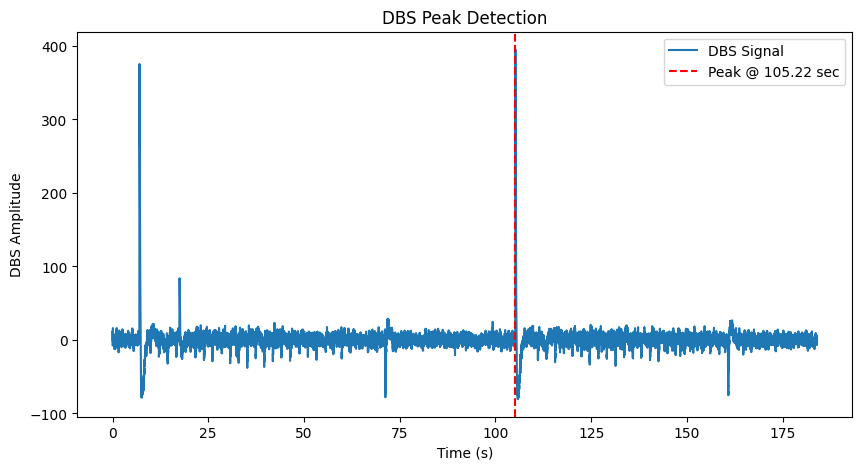

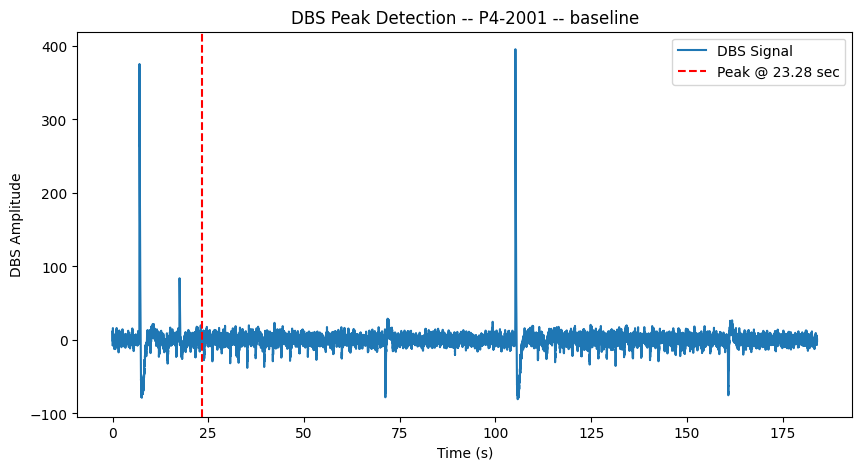

Processing P4-2002 from /Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2002/RawData/DBS/Report_Json_Session_Report_20240719T121230.json
---
Successfully read DBS recording 0 with sampling frequency 250 Hz
---
DBS peak time logged in sync_log.txt


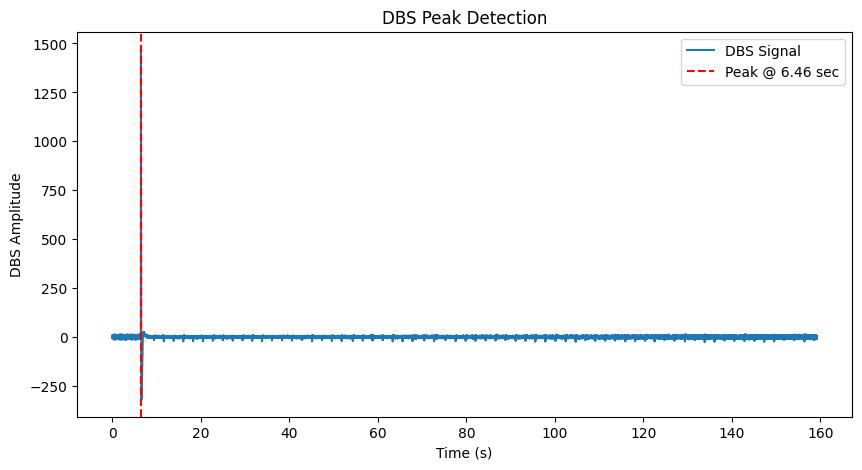

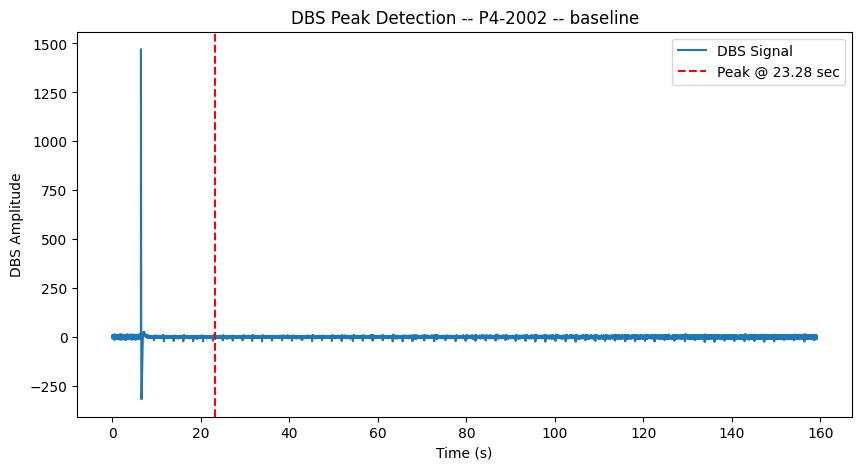

Processing P4-2003 from /Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2003/RawData/DBS/Report_Json_Session_Report_20241025T120701.json
---
Successfully read DBS recording 0 with sampling frequency 250 Hz
---
DBS peak time logged in sync_log.txt


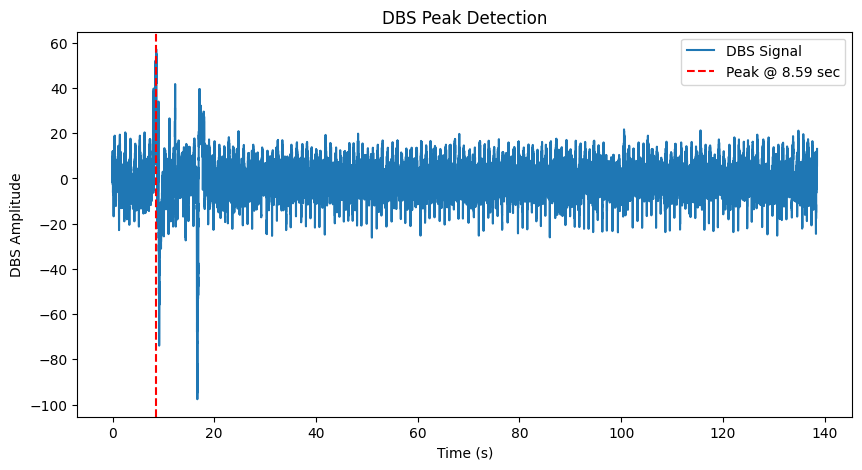

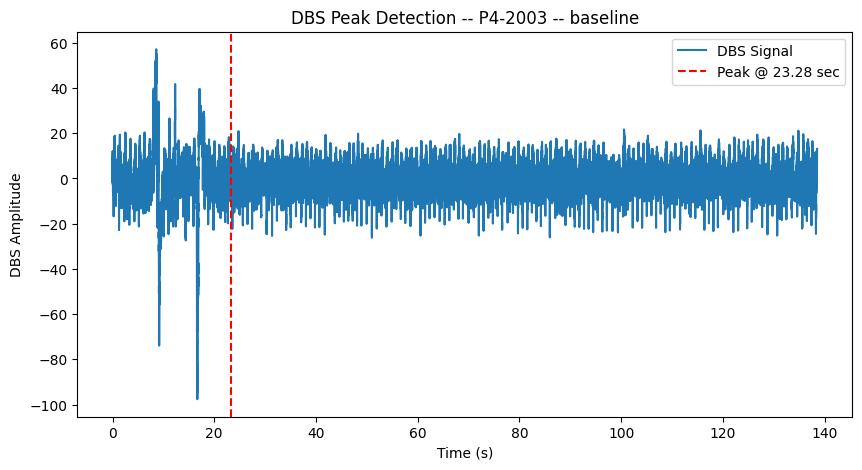

Processing P4-2004 from /Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2004/RawData/DBS/Report_Json_Session_Report_20241028T163753.json
---
Successfully read DBS recording 0 with sampling frequency 250 Hz
---
DBS peak time logged in sync_log.txt


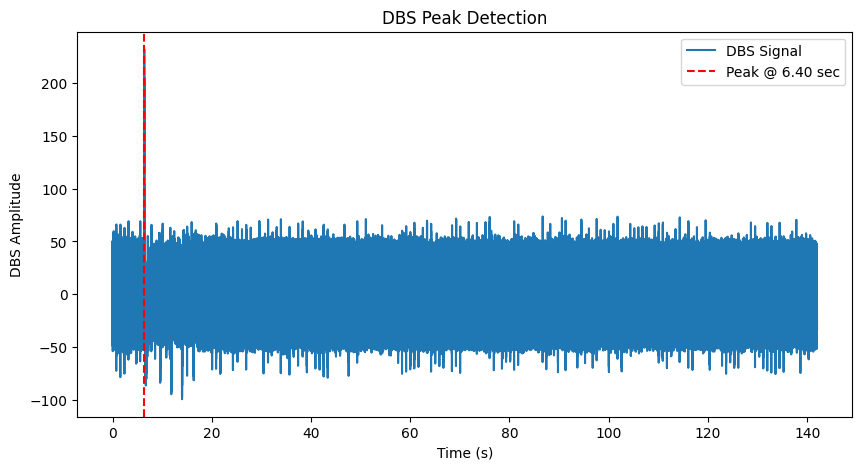

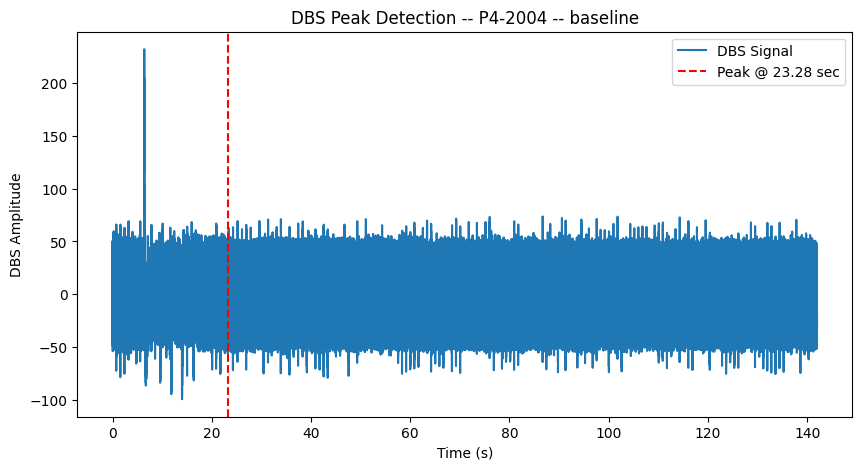

Processing P4-2005 from /Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2005/RawData/DBS/Report_Json_Session_Report_20241029T170455.json
---
Successfully read DBS recording 0 with sampling frequency 250 Hz
---
DBS peak time logged in sync_log.txt


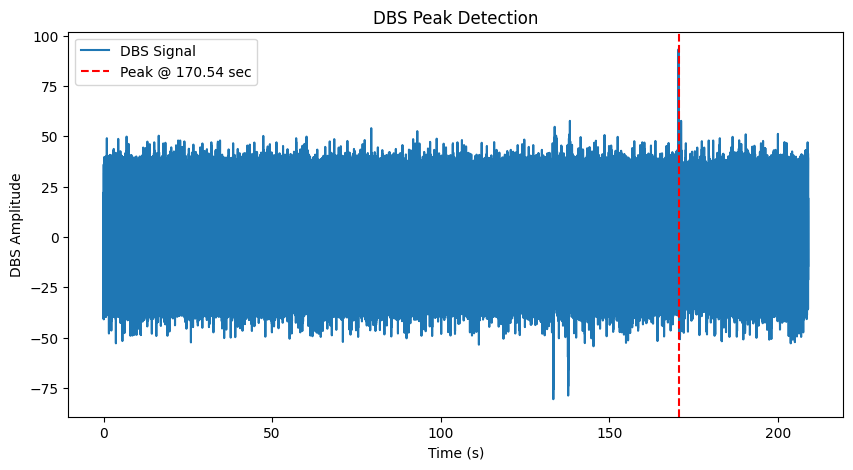

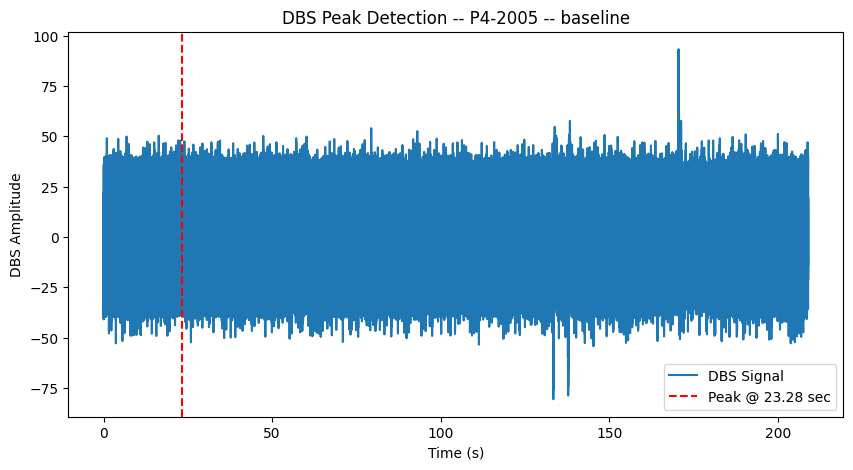

Processing P4-2007 from /Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2007/RawData/DBS/Report_Json_Session_Report_20250110T112532.json
---
Successfully read DBS recording 0 with sampling frequency 250 Hz
---
DBS peak time logged in sync_log.txt


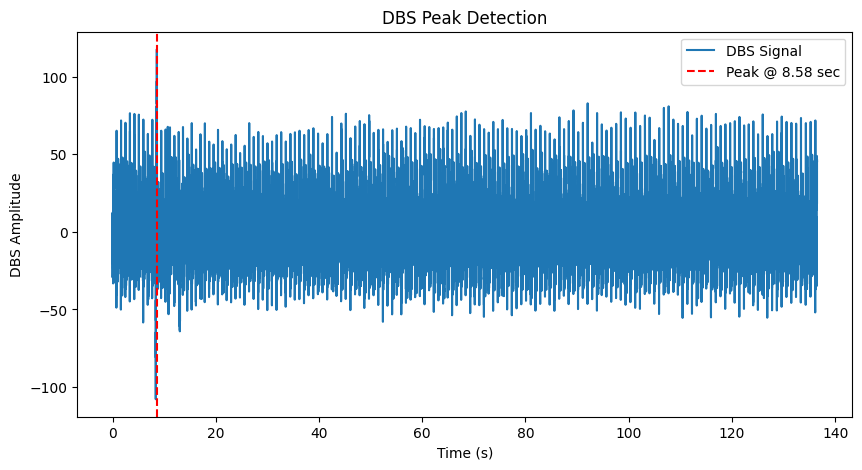

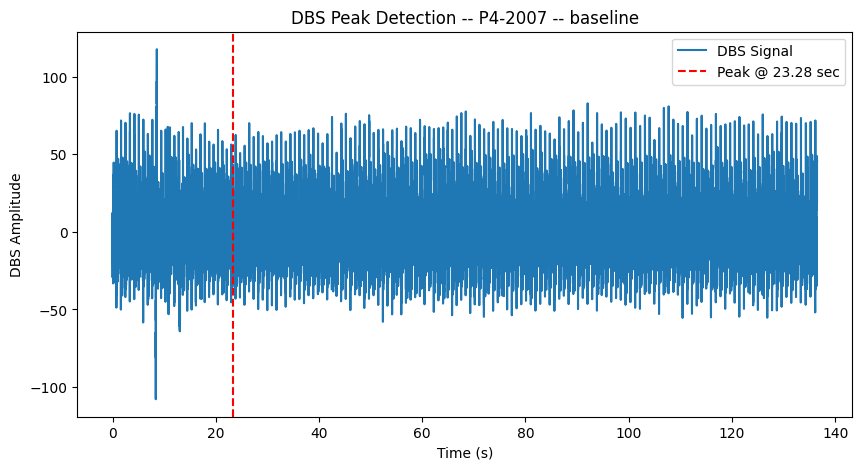

Processing P4-2008 from /Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2008/RawData/DBS/Report_Json_Session_Report_20250310T113259.json
---
Successfully read DBS recording 0 with sampling frequency 250 Hz
---
DBS peak time logged in sync_log.txt


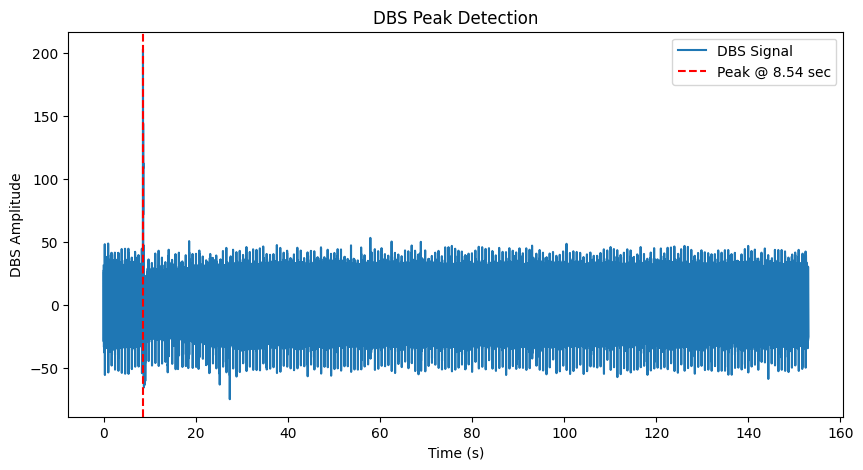

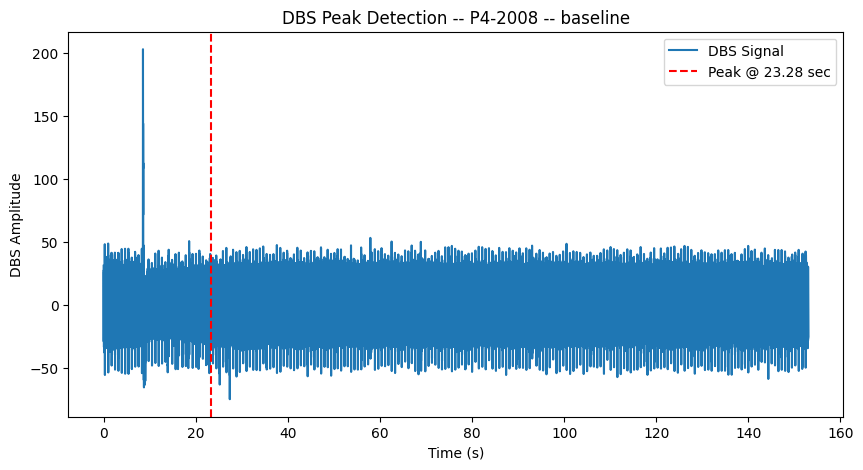

Processing P4-2009 from /Volumes/03_Neurofeedback/project_only/02_Data/Patient_NFB/P4-2009/RawData/DBS/Report_Json_Session_Report_20250314T131338.json
---
Successfully read DBS recording 0 with sampling frequency 250 Hz
---
DBS peak time logged in sync_log.txt


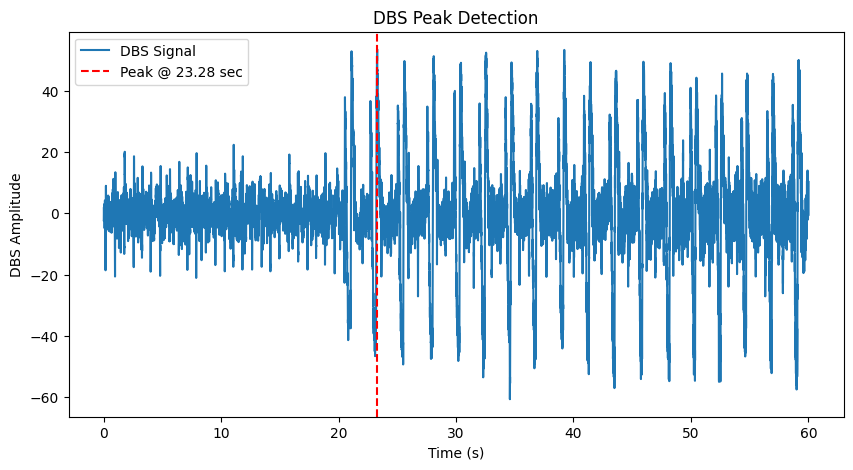

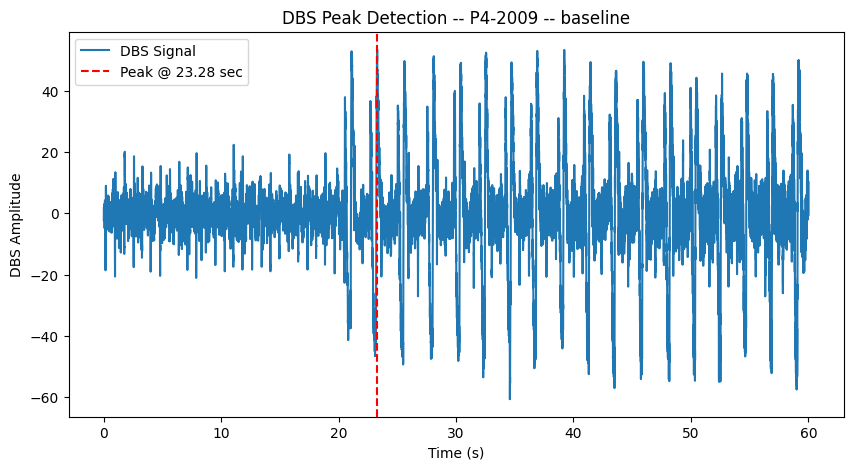

In [ ]:
for file in file_info:
    sub_id = file["sub_id"]
    dbs_path = file["file_path"]
    print(f"Processing {sub_id} from {dbs_path}")
    # Load DBS
    json_data = open_json_file(dbs_path)
    # block_num = select_recording(json_data)
    block_num = 0  # Assuming you want to process the first block
    dbs_data = read_time_domain_data(json_data, block_num)

    # Find DBS peak
    dbs_signal =  dbs_data["TimeDomainData"].values
    dbs_fs = dbs_data["SampleRateInHz"][0]
    dbs_peak_idx, dbs_peak_time = find_dbs_peak(dbs_signal, dbs_fs, save_dir=None)

    # Compute time axis
    dbs_time_axis = np.arange(len(dbs_signal)) / dbs_fs

    # Plot the DBS Signal with the detected peak    
    plt.figure(figsize=(10, 5))
    plt.plot(dbs_time_axis, dbs_signal, label="DBS Signal")
    plt.axvline(dbs_time_axis[dbs_peak_index_fs], color='r', linestyle='--', label=f'Peak @ {dbs_peak_index_s:.2f} sec')
    plt.xlabel('Time (s)')
    plt.ylabel('DBS Amplitude')
    plt.title(f'DBS Peak Detection -- {sub_id} -- {block}')
    plt.legend()

    plt.show()